## Final Project

### Introduction
#### We are going to analyze fordbike dataset and explore all the questions to study the best improvments needed to boost the profit

In [1]:
# All imports needed for analysis
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

#### Reading the csv file

In [2]:
df = pd.read_csv('fordbike.csv')
df['age'] = 2021-df.member_birth_year
df.head(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,37.0
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,49.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,32.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,47.0
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,62.0
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,38.0
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No,32.0
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No,33.0
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No,29.0


#### Checking out the total number of entries, total number of columns, and total number of nan values per column

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
age                        175147 non-null float64
dtypes: float64(8), int64(2), obj

In [4]:
# Changing from object to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [5]:
# Lets check the distribution of the numerical columns
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,age
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437,36.193563
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,20.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000,29.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,34.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000,41.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,143.000000


In [6]:
#check for duplicated rows
df.duplicated()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
183382    False
183383    False
183384    False
183385    False
183386    False
183387    False
183388    False
183389    False
183390    False
183391    False
183392    False
183393    False
183394    False
183395    False
183396    False
183397    False
183398    False
183399    False
183400    False
183401    False
183402    False
183403    False
183404    False
183405    False
183406    False
183407    False
183408    False
183409    False
183410    False
183411    False
Length: 183412, dtype: b

In [7]:
# Drop duplicates if they occur and recheck the number of entries to see if any rows are dropped
df.drop_duplicates(inplace=True)


In [8]:
# Droppin rows with na values in station names and ids and gender
df = df[df['start_station_id'].notna()]
df = df[df['member_gender'].notna()]

In [9]:
#Fill in birth year with median value
df['member_birth_year'].fillna((df['member_birth_year'].median()), inplace=True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
age                        174952 non-null float64
dtypes: datetime6

### Exploration

#### Research Question 1 (Which gender use the fordbike more? )

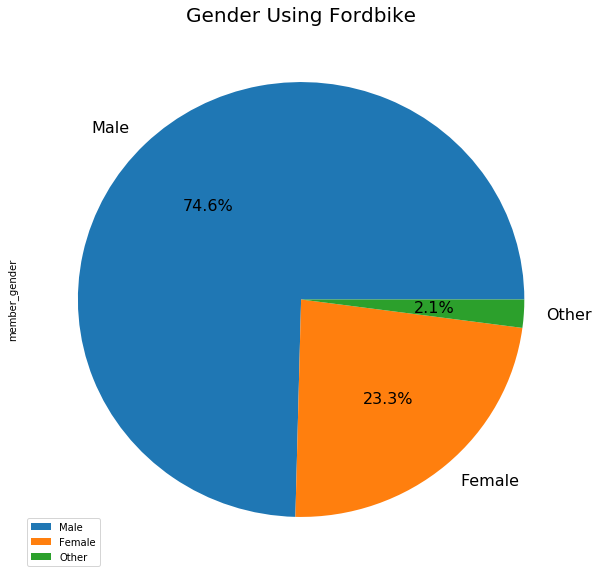

In [11]:
df_gender = df[['member_gender']]
genderPie = df_gender['member_gender'].value_counts()
pieChart = genderPie.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 16);
pieChart.set_title("Gender Using Fordbike", fontsize = 20);
plt.legend();

#### Research Question 2 (What is the ratio of subscribers to customers? )

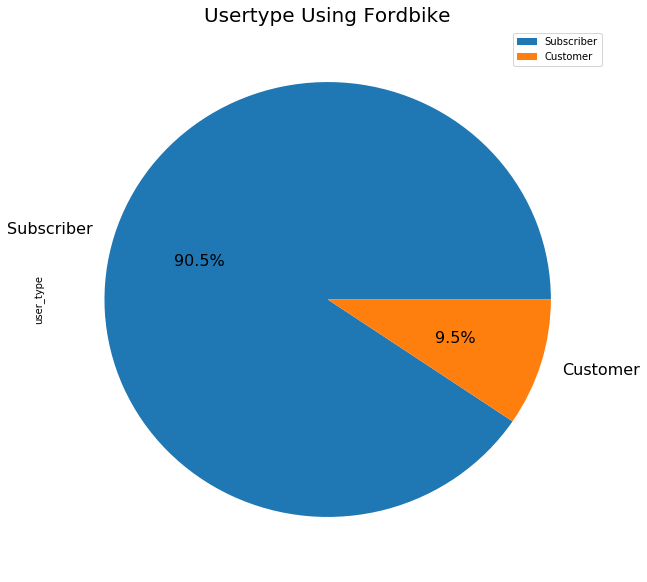

In [12]:
df_user_type = df[['user_type']]
genderPie = df_user_type['user_type'].value_counts()
pieChart = genderPie.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 16);
pieChart.set_title("Usertype Using Fordbike", fontsize = 20);
plt.legend();


#### Research Question 3 (What is percentage of bikeshare for all the trips? )

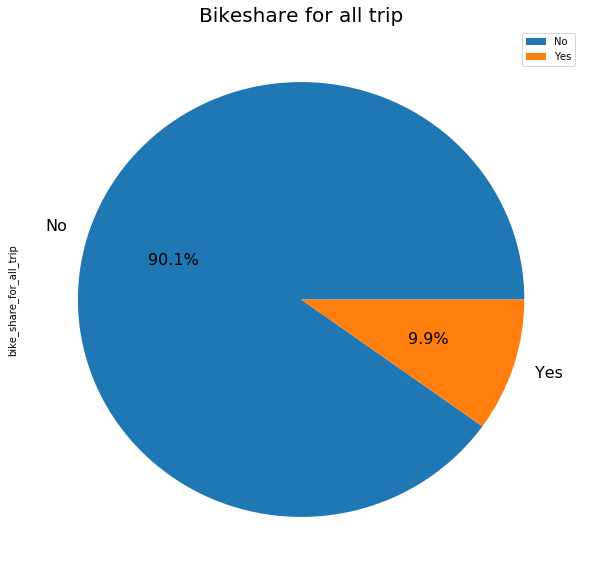

In [13]:
df_bike_share_for_all_trip = df[['bike_share_for_all_trip']]
genderPie = df_bike_share_for_all_trip['bike_share_for_all_trip'].value_counts()
pieChart = genderPie.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 16);
pieChart.set_title("Bikeshare for all trip", fontsize = 20);
plt.legend();



#### Research Question 4 (What is the range age of riders? )

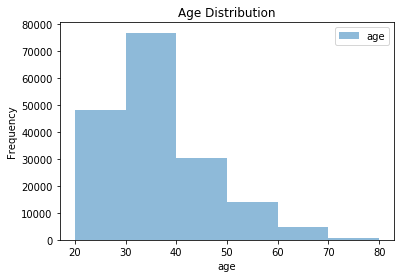

In [20]:
df_age = df[['age']]
nowshow_age = df_age.plot.hist(bins=6,range=[20, 80], alpha=0.5, title="Age Distribution")
plt.xlabel('age')
plt.show()

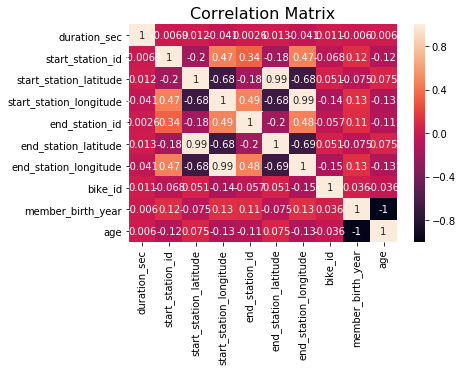

In [32]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix', fontsize=16);

In [33]:
upyter nbconvert presentation.ipynb --to slides

SyntaxError: invalid syntax (<ipython-input-33-1d1ca0382e64>, line 1)